In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

C:\Users\Pranav tiwari\AppData\Local\Temp\ipykernel_7052\2136054206.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dataset= pd.read_csv("HAL.NS.csv")
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-17,1554.900024,1584.400024,1550.849976,1566.949951,1549.753540,2582144
1,2023-05-18,1572.500000,1574.800049,1533.500000,1546.949951,1529.972900,1786942
2,2023-05-19,1555.000000,1555.000000,1522.500000,1536.650024,1519.786011,1215278
3,2023-05-22,1542.449951,1553.500000,1524.300049,1549.650024,1532.643433,1190554
4,2023-05-23,1552.000000,1564.275024,1521.000000,1523.199951,1506.483521,1497886


In [4]:
train_set= dataset.iloc[:, 2:3].values

def convert_strings_to_floats(input_array):
    output_array = []
    for element in input_array:
        converted_float = float(element)
        output_array.append(converted_float)
    return output_array


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range= (0,1))
scaled_set= scaler.fit_transform(train_set)
scaled_set

array([[0.02188544],
       [0.01883831],
       [0.01255358],
       [0.01207746],
       [0.01549756],
       [0.00618949],
       [0.        ],
       [0.00618949],
       [0.00363437],
       [0.0135296 ],
       [0.02445645],
       [0.01064912],
       [0.02285351],
       [0.04683385],
       [0.06492621],
       [0.07841613],
       [0.08199494],
       [0.11967942],
       [0.12206   ],
       [0.1060308 ],
       [0.11237899],
       [0.11368037],
       [0.13570862],
       [0.14586574],
       [0.13777179],
       [0.136399  ],
       [0.1266545 ],
       [0.13158229],
       [0.1093636 ],
       [0.11729885],
       [0.11333122],
       [0.12313126],
       [0.12381369],
       [0.11967942],
       [0.11396604],
       [0.11647359],
       [0.11964769],
       [0.12206   ],
       [0.14507222],
       [0.14331852],
       [0.13771622],
       [0.13269323],
       [0.13999366],
       [0.13396287],
       [0.13539121],
       [0.13268529],
       [0.13697826],
       [0.140

In [6]:
X_train= []
y_train= []
for i in range(60, 247):
    X_train.append(scaled_set[i-60:i, 0])
    y_train.append(scaled_set[i, 0])
X_train= np.array(X_train)
X_test= X_train[127:]
y_train= np.array(y_train)

In [7]:
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(60, 60, 1)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
regressor= Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

C:\Users\Pranav tiwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.1548
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0281
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0147
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0118
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0088
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0107
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0075
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0073
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0063
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0062
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0054
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0063
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0052
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0074
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0046
Epoch 16/100
6/6 ━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


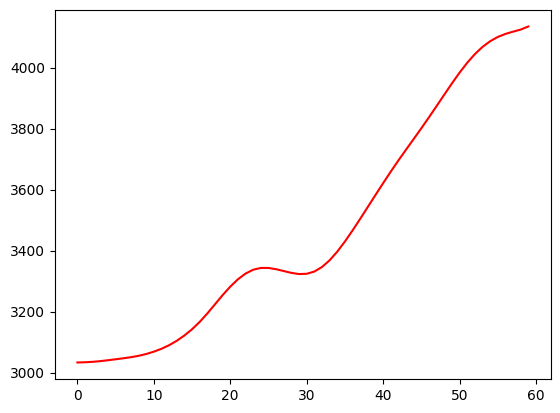

In [12]:
predicted_price= regressor.predict(X_test)
predicted_price= scaler.inverse_transform(predicted_price)

plt.plot(predicted_price, color= 'red')